In [14]:
import pandas as pd
import os
import pickle
from preprocess import *
from soplata import *
from utils import *

# read assessment data
with open('/home/sohrob/Dropbox/Code/MATLAB/CS120/Assessment/assessment.dat') as f:
    assessment = pickle.load(f)
f.close()
subjects = assessment['Subject']

# read location and reason data
data_dir = 'features/'

reasons = []
locations = []
durations = []
accomplishments = []
pleasures = []
ind_toremove = []
for (i,subject) in enumerate(subjects):
    print i,
    filename = data_dir+subject+'.dat'
    if os.path.exists(filename):
        
        with open(filename) as f:
            feature, target = pickle.load(f)
        f.close()
        
        reasons.append(list(target['reason']))
        locations.append(list(target['location']))
        durations.append(np.array(feature['duration']))
        accomplishments.append(np.array(target['accomplishment']))
        pleasures.append(np.array(target['pleasure']))
        
    else:
        ind_toremove.append(i) 
        print 'subject {} skipped because no data.'.format(subject)

# remove assessments of subject which don't exist in sensor feature data
assessment = assessment.drop(ind_toremove, axis=0)
assessment = assessment.reset_index(drop=True)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 subject EW057DI skipped because no data.
38 39 40 41 42 43 44 45 46 47 48 subject 1422927 skipped because no data.
49 50 51 52 subject 1367477 skipped because no data.
53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 subject 1496251 skipped because no data.
73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 subject .dropbox skipped because no data.
186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 subject all-2.json skipped because no data.
205 206 207 208 209


In [19]:
# finding location frequencies across subjects

save_results = True

# getting top locations
loc_top, _ = get_top(locations, 10)

loc_top_dur = ['DUR '+lt for lt in loc_top]

loc_freq = pd.DataFrame(index=range(len(locations)),columns=loc_top)
loc_dur = pd.DataFrame(index=range(len(locations)),columns=loc_top_dur)
for (i,loc_subject) in enumerate(locations):
    for (j,loc_t) in enumerate(loc_top):
        loc_freq.loc[i,loc_t] = loc_subject.count(loc_t)/float(len(loc_subject))
        loc_dur.loc[i,loc_top_dur[j]] = np.mean(durations[i][np.array(loc_subject)==loc_t])

if save_results:
    with open('top_locations.dat','w') as f:
        pickle.dump(loc_top, f)
    f.close()

In [21]:
# finding reason frequencies across subjects

save_results = True
# getting top reasons
reason_top, freq_top = get_top(reasons, 12)

reason_top_dur = ['DUR '+rt for rt in reason_top]

reason_freq = pd.DataFrame(index=range(len(reasons)),columns=reason_top)
reason_dur = pd.DataFrame(index=range(len(reasons)),columns=reason_top_dur)
for (i,reason_subject) in enumerate(reasons):
    for (j,reason_t) in enumerate(reason_top):
        reason_freq.loc[i,reason_t] = reason_subject.count(reason_t)/float(len(reason_subject))
        reason_dur.loc[i,reason_top_dur[j]] = np.mean(durations[i][np.array(reason_subject)==reason_t])

if save_results:
    with open('top_reasons.dat','w') as f:
        pickle.dump(reason_top, f)
    f.close()        

In [23]:
print reason_top
print freq_top

['home', 'errand', 'dining', 'socialize', 'work', 'entertainment', 'travelling / traffic', 'dining, socialize', 'socialize, dining', 'exercise', 'shopping', 'socialize, entertainment']
[191, 187, 170, 157, 133, 92, 67, 65, 49, 49, 41, 28]


In [17]:
# accomplishment and pleasure means and vars

accomp = pd.DataFrame(index=range(len(locations)),columns=['accomplishment mean','accomplishment var'])
for (i,acc) in enumerate(accomplishments):
    accomp.loc[i,'accomplishment mean'] = np.nanmean(acc)
    accomp.loc[i,'accomplishment var'] = np.nanvar(acc)

pleas = pd.DataFrame(index=range(len(locations)),columns=['pleasure mean','pleasure var'])
for (i,pl) in enumerate(pleasures):
    pleas.loc[i,'pleasure mean'] = np.nanmean(pl)
    pleas.loc[i,'pleasure var'] = np.nanvar(pl)

In [ ]:
# from numba import jit, autojit
# cov_numba = autojit(calculate_covariance)

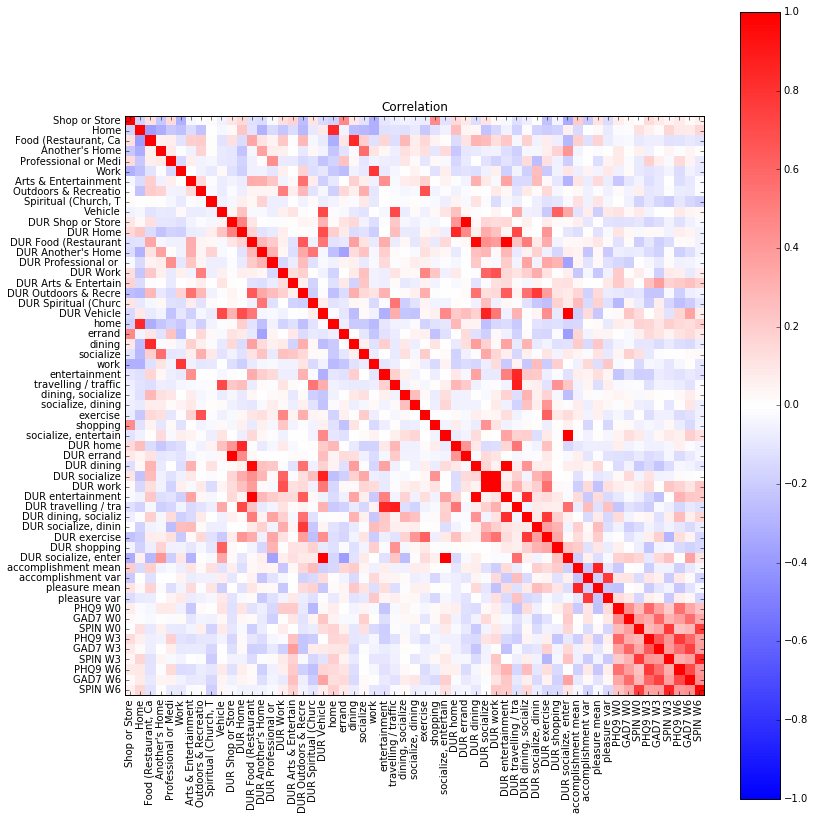

In [18]:
# correlation matrix

data_fm = pd.concat([loc_freq, loc_dur, reason_freq, reason_dur, accomp, pleas, assessment.drop(['Subject'],axis=1)], axis=1)

data_cov = calculate_covariance(data_fm.values.astype(float))

%matplotlib inline

# truncate labels
labs = [lab[0:20] for lab in data_fm.columns]

plot_confusion_matrix(data_cov, labels=labs, cmap=plt.cm.bwr)

In [ ]:
loc_dur